In [17]:
import sys
import os

# Agregar la carpeta src al path
sys.path.append(os.path.join(os.getcwd(), 'src'))
from Graficas import *
from ProcesamientoDatos import *
from ObtencionDatos import *
from ExportarResultados import *

In [18]:
print("="*60)
print("OBTENCION DE DATOS DE UN CSV")
print("="*60)
print()
df = obtener_datos("Data/Finzen.csv")
print(df.head())

OBTENCION DE DATOS DE UN CSV

   id      Start time Completion time      Email  Name        nombre  \
0   1  2/10/2025 8:51  2/10/2025 8:56  anonymous   NaN         Isaac   
1   2  2/10/2025 8:57  2/10/2025 9:00  anonymous   NaN        Xavier   
2   3  2/10/2025 9:04  2/10/2025 9:05  anonymous   NaN    Alejandra    
3   4  2/10/2025 9:03  2/10/2025 9:06  anonymous   NaN        Mathew   
4   5  2/10/2025 9:10  2/10/2025 9:14  anonymous   NaN  María Belén    

            apellido  edad      cedula                       Correo  ...  \
0            Andrade    24  1750844597      isacarias08@hotmail.com  ...   
1            Espinel    26  1004329155    edison.espinel@epn.edu.ec  ...   
2              Ruiz     22  1728732601          Ruiz.03jb@gmail.com  ...   
3         Gutierrez     23  1726711490  mathew.gutierrez@epn.edu.ec  ...   
4  Figueroa Sánchez     21  1317470910  figueroabelen1705@gmail.com  ...   

  trabajo_actual          ocupacion emprendimiento_actual nombre_negocio  \
0   

In [19]:
print("="*60)
print("PROCESAMIENTO DE DATOS DE UN CSV")
print("="*60)
print()
df_procesado = procesar_datos(df)
print(df_procesado.head())

PROCESAMIENTO DE DATOS DE UN CSV

   id        nombre           apellido  edad      cedula  \
0   1         Isaac            Andrade    24  1750844597   
1   2        Xavier            Espinel    26  1004329155   
2   3    Alejandra               Ruiz     22  1728732601   
3   4        Mathew         Gutierrez     23  1726711490   
4   5  María Belén   Figueroa Sánchez     21  1317470910   

                        Correo     genero  apoyo_familiar  estudio_actual  \
0      isacarias08@hotmail.com  Masculino               1               1   
1    edison.espinel@epn.edu.ec  Masculino               1               1   
2          Ruiz.03jb@gmail.com   Femenino               1               1   
3  mathew.gutierrez@epn.edu.ec  Masculino               1               1   
4  figueroabelen1705@gmail.com   Femenino               1               1   

                                 carrera  trabajo_actual          ocupacion  \
0                       Ingeniería Civil               1  Perso

In [20]:
print("="*60)
print("FILTRADO DE DATOS")
print("="*60)
print()
df_finanzas, df_estadisticas, df_equilibrio, df_tipo_ingreso = filtrar_datos(df_procesado)

print("--- df_finanzas (Ingresos = 1) ---")
print(df_finanzas.head())
print("\n--- df_estadisticas (Todos) ---")
print(df_estadisticas.head())
print("\n--- df_equilibrio (Ingresos = 1) ---")
print(df_equilibrio.head())
print("\n--- df_tipo_ingreso (Todos) ---")
print(df_tipo_ingreso.head())

FILTRADO DE DATOS

--- df_finanzas (Ingresos = 1) ---
         nombre       apellido      cedula  edad     genero  \
0         Isaac        Andrade  1750844597    24  Masculino   
1        Xavier        Espinel  1004329155    26  Masculino   
3        Mathew     Gutierrez   1726711490    23  Masculino   
5  Maria Emilia  Guerra Cedeño  1724658537    18   Femenino   
7      Joselyn       Amaguaña   1751385905    19   Femenino   

                       ingresos  \
0              {'Trabajo': 150}   
1          {'Mensualidad': 500}   
3          {'Mensualidad': 100}   
5           {'Mensualidad': 50}   
7  {'Beca': 27, 'Familia': 100}   

                                 gastos_prioritarios  \
0                                {'Universidad': 70}   
1  {'Comida': 100, 'ServiciosBásicos': 100, 'Otro...   
3                                     {'Comida': 55}   
5                   {'lavanderia': 10, 'comida': 40}   
7        {'Pasaje': 15, 'Comida': 10, 'Mascota': 10}   

          gastos_se

GRAFICAS
Personales (orientados al usuario)


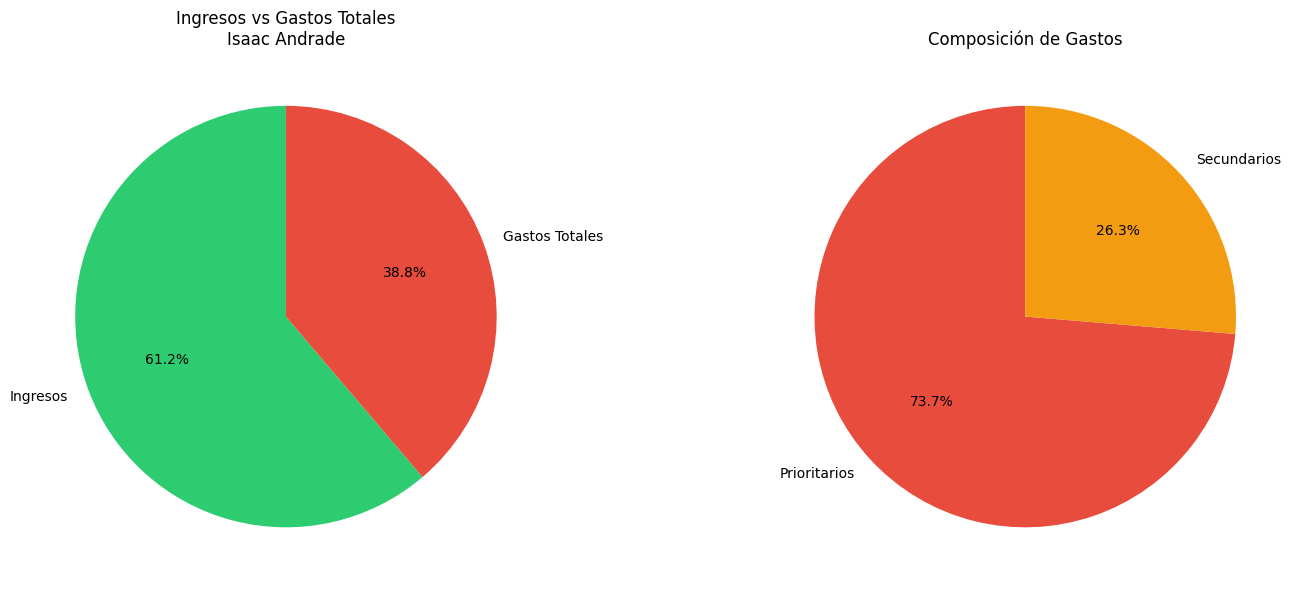

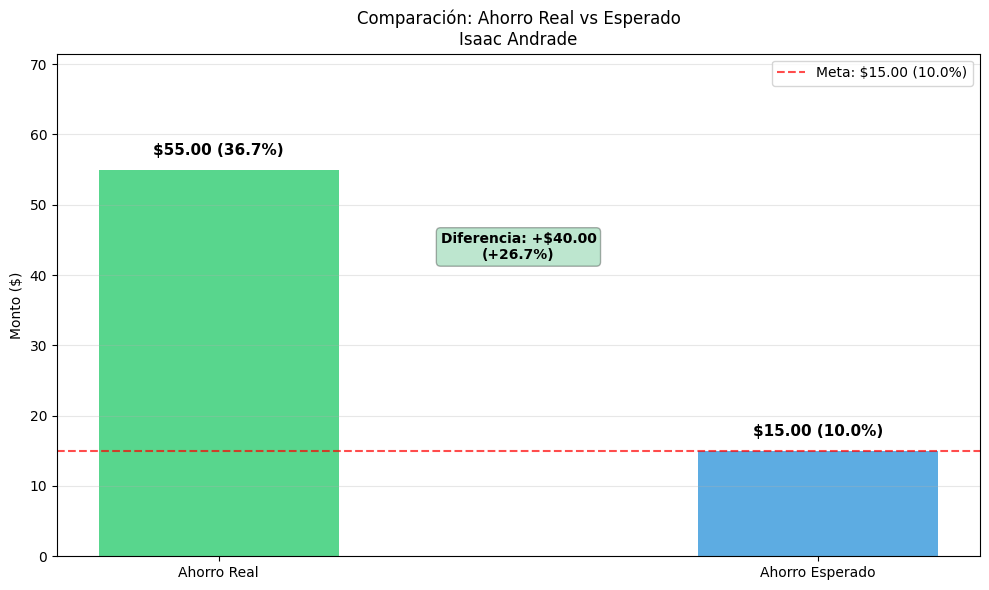

In [21]:
print("="*60)
print("GRAFICAS")
print("="*60)
print("Personales (orientados al usuario)")

grafico_finanzas_personales(df_finanzas, '1750844597')
grafico_comparativo_completo(df_finanzas, '1750844597')

GRAFICAS
Generales(orientados a los datos)


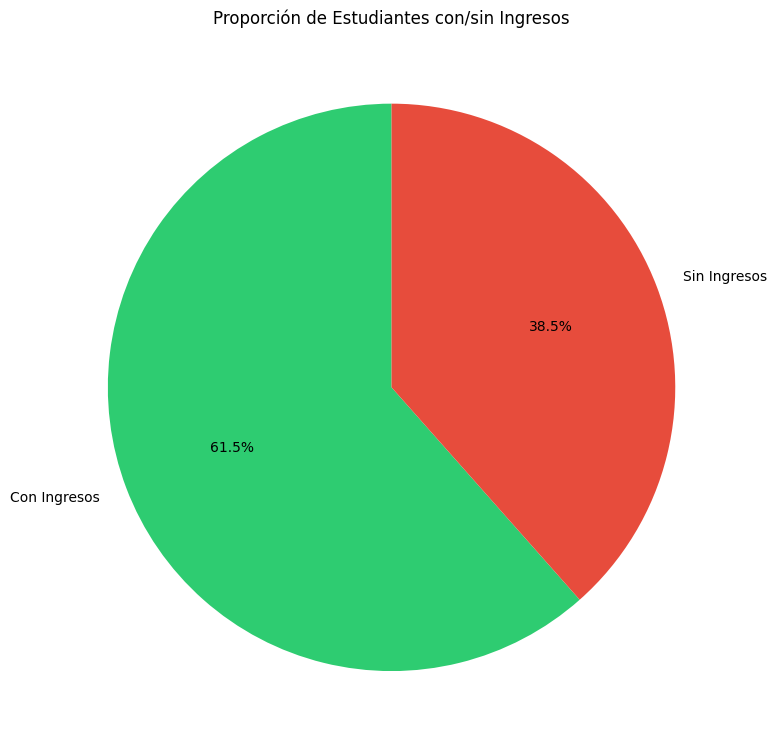

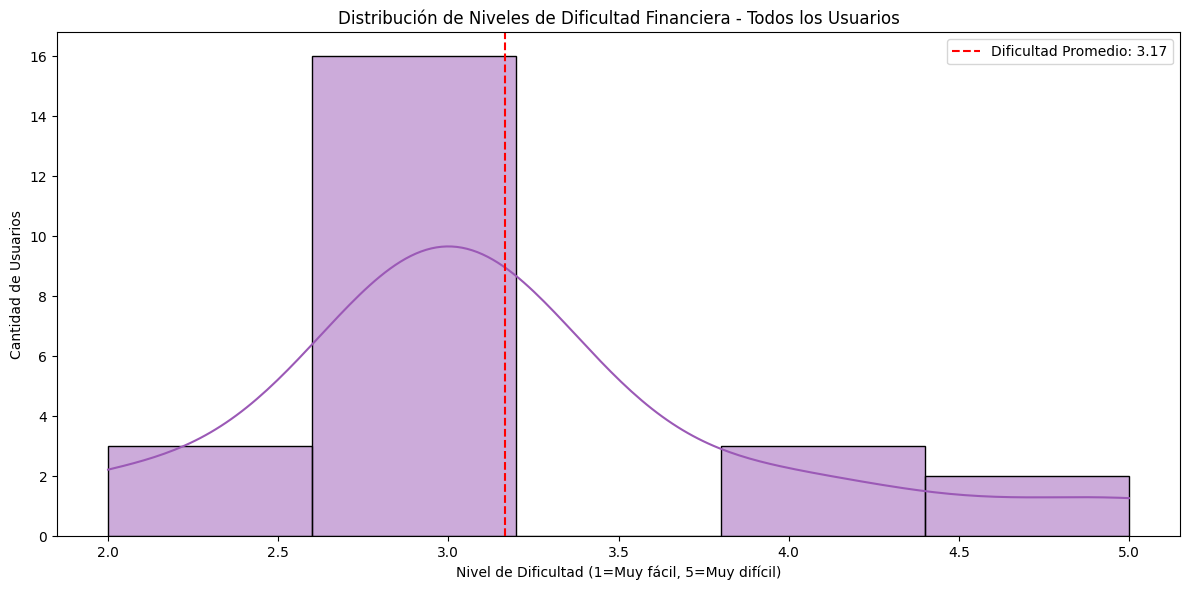

c:\Users\59399\Documentos\EPN\Samsung\Proyecto\sic-ecuador-2025-proyectos\EC03\FINZEN GESTIÓN Y MANEJO DE FINANZAS PERSONALES MEDIANTE VISUALIZACIÓN DE DATOS EN JÓVENES\src\Graficas.py:166: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  datos_agrupados = df_finanzas.groupby('grupo_edad').agg({


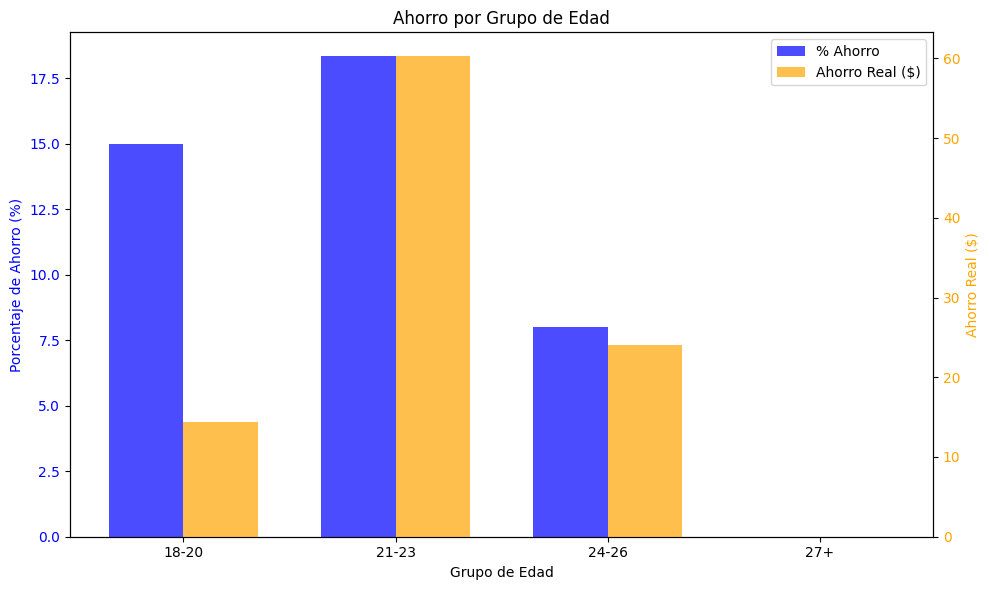

In [22]:
print("="*60)
print("GRAFICAS")
print("="*60)
print("Generales(orientados a los datos)")
proporcion_ingresos(df_tipo_ingreso)
dificultad_financiera_general(df_equilibrio)
edad_vs_ahorro(df_finanzas)

In [23]:
#====================================================================#
#             4.             Interpretación de Datos                 #
#====================================================================#

# 1️.- Edad con mayores gastos

if "edad" in df_finanzas.columns and ("total_gastos" in df_finanzas.columns or "gastos_prioritarios" in df_finanzas.columns):
    # Calcular total_gastos si no existe
    if "total_gastos" not in df_finanzas.columns:
        def _sumar_gastos(fila):
            gp = sum(fila["gastos_prioritarios"].values()) if isinstance(fila.get("gastos_prioritarios"), dict) else 0
            gs = sum(fila["gastos_secundarios"].values()) if isinstance(fila.get("gastos_secundarios"), dict) else 0
            return gp + gs
        df_finanzas["total_gastos"] = df_finanzas.apply(_sumar_gastos, axis=1)

    # Promedio de gasto por edad
    promedio_por_edad = (
        df_finanzas.groupby("edad")["total_gastos"]
        .mean()
        .reset_index()
        .sort_values("total_gastos", ascending=False)
    )

    edad_max_gasto = promedio_por_edad.iloc[0]
    print("\n EDAD CON MAYORES GASTOS")
    print("-" * 50)
    print(f"La edad con mayor gasto promedio es {int(edad_max_gasto['edad'])} años, con un gasto medio de ${edad_max_gasto['total_gastos']:.2f}.")
    print("Esto puede reflejar que a medida que los jóvenes avanzan en edad, asumen más responsabilidades económicas o consumos personales.")

#2.- Correlación entre género y gastos
print("\nCORRELACIÓN ENTRE GÉNERO Y GASTOS ")
print("-" * 50)

df_corr = df_finanzas.copy()

# Convertir 'genero' a valores numéricos (0,1,2)
if "genero" in df_corr.columns:
    df_corr["genero_num"] = df_corr["genero"].astype("category").cat.codes

# Seleccionar solo columnas numéricas relevantes
columnas_numericas = [c for c in df_corr.columns if pd.api.types.is_numeric_dtype(df_corr[c])]

if len(columnas_numericas) >= 2:
    matriz_correlacion = df_corr[columnas_numericas].corr()

    print("Matriz de correlación (valores redondeados a 3 decimales):")
    print(matriz_correlacion.round(3))

    # Interpretación enfocada 
    if "genero_num" in matriz_correlacion.columns and "total_gastos" in matriz_correlacion.columns:
        corr_gen_gasto = matriz_correlacion.loc["genero_num", "total_gastos"]
        print("\n Interpretación del resultado:")
        if abs(corr_gen_gasto) < 0.2:
            print(f"- Correlación débil ({corr_gen_gasto:.3f}): el género tiene poca influencia en el nivel de gastos.")
        elif abs(corr_gen_gasto) < 0.5:
            print(f"- Correlación moderada ({corr_gen_gasto:.3f}): se observan ligeras diferencias en el comportamiento de gasto entre géneros.")
        else:
            print(f"- Correlación fuerte ({corr_gen_gasto:.3f}): existe una clara relación entre el género y el nivel de gasto.")
        print("En el contexto del proyecto FINZEN, esto puede reflejar diferentes patrones de consumo y prioridades financieras entre jóvenes según su género.")


# 3️.- Ahorro y dificultad percibida

if "ahorro_real" in df_finanzas.columns and "dificultad_equilibrio" in df_finanzas.columns:
    correlacion_ahorro_dificultad = df_finanzas["ahorro_real"].corr(df_finanzas["dificultad_equilibrio"])
    print("\n RELACIÓN ENTRE AHORRO Y DIFICULTAD FINANCIERA")
    print("-" * 50)
    print(f"Coeficiente de correlación: {correlacion_ahorro_dificultad:.3f}")
    if correlacion_ahorro_dificultad < -0.5:
        print(" Correlación negativa fuerte: a mayor ahorro, menor dificultad para equilibrar las finanzas.")
    elif correlacion_ahorro_dificultad < -0.2:
        print("Correlación negativa moderada: quienes logran ahorrar suelen sentir menos presión económica.")
    else:
        print("Correlación baja o nula: el ahorro real no parece influir directamente en la dificultad percibida.")


 EDAD CON MAYORES GASTOS
--------------------------------------------------
La edad con mayor gasto promedio es 26 años, con un gasto medio de $330.00.
Esto puede reflejar que a medida que los jóvenes avanzan en edad, asumen más responsabilidades económicas o consumos personales.

CORRELACIÓN ENTRE GÉNERO Y GASTOS 
--------------------------------------------------
Matriz de correlación (valores redondeados a 3 decimales):
                    edad  porcentaje_ahorro  ahorro_real  total_gastos  \
edad               1.000             -0.189       -0.017         0.232   
porcentaje_ahorro -0.189              1.000        0.952         0.115   
ahorro_real       -0.017              0.952        1.000         0.280   
total_gastos       0.232              0.115        0.280         1.000   
genero_num         0.083              0.180        0.270         0.149   

                   genero_num  
edad                    0.083  
porcentaje_ahorro       0.180  
ahorro_real             0.270  